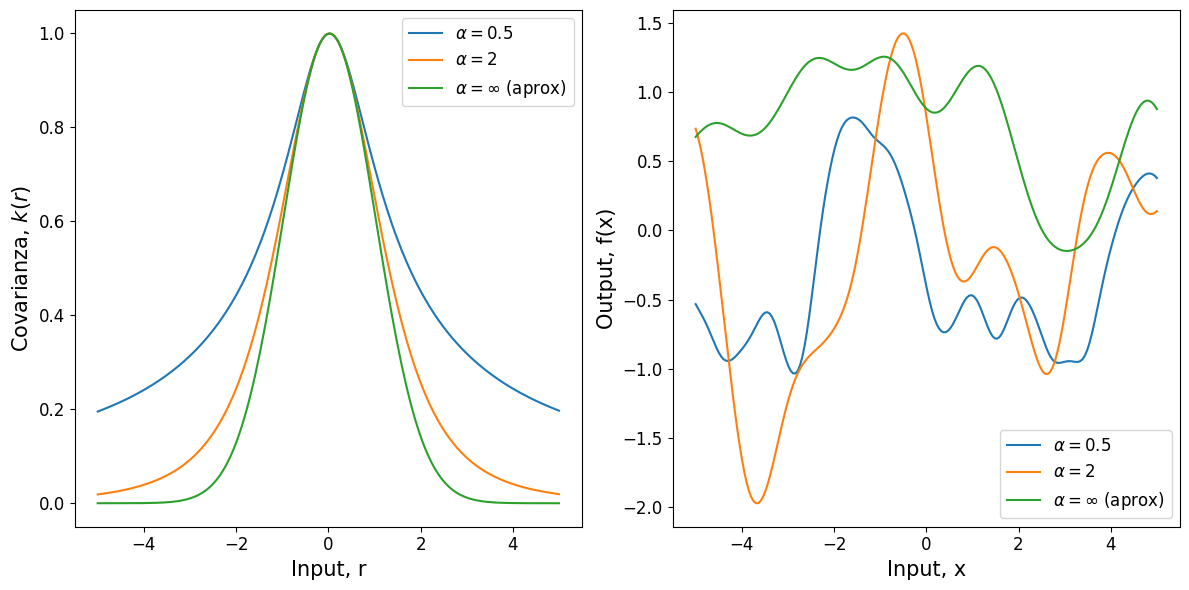

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RationalQuadratic
from scipy.stats import multivariate_normal

# Input range
x = np.linspace(-5, 5, 200)

# Compute the covariance matrices for different alpha values
rq_0_5 = RationalQuadratic(length_scale=1.0, alpha=0.5)
rq_2 = RationalQuadratic(length_scale=1.0, alpha=2.0)
rq_inf = RationalQuadratic(length_scale=1.0, alpha=9999999)  # alpha=np.inf no es posible, así que usamos un valor muy grande

X = x[:, np.newaxis]
K_0_5 = rq_0_5(X, X)
K_2 = rq_2(X, X)
K_inf = rq_inf(X, X)

# Tomar una f por kernel
np.random.seed(42)
f_0_5 = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_0_5)
f_2 = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_2)
f_inf = multivariate_normal.rvs(mean=np.zeros(len(x)), cov=K_inf)

# Plot funciones de covarianza
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, K_0_5[len(x)//2], label=r'$\alpha=0.5$')
plt.plot(x, K_2[len(x)//2], label=r'$\alpha=2$')
plt.plot(x, K_inf[len(x)//2], label=r'$\alpha=\infty$ (aprox)')
plt.xlabel('Input, r', fontsize=15)
plt.ylabel('Covarianza, $k(r)$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Se muestra un ejemplo por valor de alpha
plt.subplot(1, 2, 2)
plt.plot(x, f_0_5, label=r'$\alpha=0.5$')
plt.plot(x, f_2, label=r'$\alpha=2$')
plt.plot(x, f_inf, label=r'$\alpha=\infty$ (aprox)')
plt.xlabel('Input, x', fontsize=15)
plt.ylabel('Output, f(x)', fontsize=15)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
